In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gsutil cp gs://imcinstitute/data/flight.csv .
raw_pd = pd.read_csv("flight.csv")

Copying gs://imcinstitute/data/flight.csv...
/ [1 files][  1.5 MiB/  1.5 MiB]                                                
Operation completed over 1 objects/1.5 MiB.                                      


## 1. Business Understanding

## 2. Data Understanding

#### 2.1 ดู contents 5 rows แรก

In [3]:
raw_pd.head(5)

,date,airline,departure_airport,arrival_airport,departure_delay,arrival_delay,dayofweek,month,delayed
0,2009-02-05,WN,SFO,LAX,2,1,5,2,0
1,2009-02-05,WN,SFO,LAX,47,43,5,2,1
2,2009-02-05,WN,SFO,LAX,52,42,5,2,1
3,2009-02-05,WN,SFO,LAX,92,84,5,2,1
4,2009-02-05,WN,SFO,LAX,80,76,5,2,1


#### 2.2 ดู Shape ของข้อมูล พบว่า เป็นแบบ 2 Dimensions

In [4]:
raw_pd.shape

(47785, 9)

#### 2.3 ดู Data Type ของแต่ละ Attributes

In [5]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47785 entries, 0 to 47784
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               47785 non-null  object
 1   airline            47785 non-null  object
 2   departure_airport  47785 non-null  object
 3   arrival_airport    47785 non-null  object
 4   departure_delay    47785 non-null  int64 
 5   arrival_delay      47785 non-null  int64 
 6   dayofweek          47785 non-null  int64 
 7   month              47785 non-null  int64 
 8   delayed            47785 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 3.3+ MB


#### 2.4 ตรวจสอบค่า Null ในแต่ละ Attributes

In [6]:
raw_pd.isnull().sum()

date                 0
airline              0
departure_airport    0
arrival_airport      0
departure_delay      0
arrival_delay        0
dayofweek            0
month                0
delayed              0
dtype: int64

In [7]:
# กำหนด Cols ที่ contain NULL แต่ธุรกิจจำเป็นต้องใช้
nullNeedCol_list = []

#### 2.5 EDA with Frequency Distribution เพื่อดู Bias

In [8]:
# Define categorical columns
categorical_list = list(raw_pd.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical_list}")

# Define numerical columns
numerical_list = list(raw_pd.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical_list}")

Categorical columns are: ['date', 'airline', 'departure_airport', 'arrival_airport']
Numerical columns are: ['departure_delay', 'arrival_delay', 'dayofweek', 'month', 'delayed']


#### 2.6 EDA with Frequency Distribution of Categorical Values

In [9]:
for item_cat in categorical_list:
    print(raw_pd.groupby(item_cat).agg({item_cat:'count'})\
          .apply(lambda x:100 * x / float(x.sum()))\
    .apply(lambda x: x.sort_values(ascending=False)))

                date
date                
2009-12-21  0.585958
2009-06-12  0.514806
2009-06-11  0.512713
2009-06-15  0.504342
2009-02-13  0.502250
...              ...
2009-09-06  0.106728
2009-01-13  0.098357
2009-01-21  0.098357
2009-03-07  0.096265
2009-11-26  0.069059

[365 rows x 1 columns]
           airline
airline           
OO       29.011196
UA       25.150152
WN       16.352412
AA        8.452443
CO        4.986921
US        3.515748
DL        2.913048
AS        2.766559
NW        2.396149
B6        1.383279
F9        1.002407
MQ        0.922884
FL        0.858010
HA        0.276237
YV        0.012556
                   departure_airport
departure_airport                   
SFO                            100.0
                 arrival_airport
arrival_airport                 
LAX                     8.873077
SAN                     5.258972
LAS                     4.997384
DEN                     4.572565
ORD                     4.133096
...                          ...
MCI  

In [10]:
for item_cat in categorical_list:
    print(raw_pd[item_cat].value_counts())

2009-12-21    280
2009-06-12    246
2009-06-11    245
2009-06-15    241
2009-02-13    240
             ... 
2009-09-06     51
2009-01-13     47
2009-01-21     47
2009-03-07     46
2009-11-26     33
Name: date, Length: 365, dtype: int64
OO    13863
UA    12018
WN     7814
AA     4039
CO     2383
US     1680
DL     1392
AS     1322
NW     1145
B6      661
F9      479
MQ      441
FL      410
HA      132
YV        6
Name: airline, dtype: int64
SFO    47785
Name: departure_airport, dtype: int64
LAX    4240
SAN    2513
LAS    2388
DEN    2185
ORD    1975
       ... 
MCI      34
FLL      33
ASE      28
ANC      25
BZN      15
Name: arrival_airport, Length: 69, dtype: int64


#### 2.7 EDA with Frequency Distribution of Numerical Values

In [11]:
for item_num in numerical_list:
    print(raw_pd.groupby(item_num).agg({item_num:'count'})\
          .apply(lambda x:100 * x / float(x.sum()))\
    .apply(lambda x: x.sort_values(ascending=False)))

                 departure_delay
departure_delay                 
1                       7.707440
2                       6.039552
3                       4.857173
4                       4.444909
5                       3.764780
...                          ...
115                     0.142304
107                     0.142304
117                     0.138119
120                     0.127655
119                     0.110913

[120 rows x 1 columns]
               arrival_delay
arrival_delay               
 0                  2.080151
-2                  2.071780
-1                  2.071780
 1                  2.067594
 2                  2.063409
...                      ...
-57                 0.002093
-50                 0.002093
-54                 0.002093
-56                 0.002093
 189                0.002093

[221 rows x 1 columns]
           dayofweek
dayofweek           
6          15.877367
1          15.605315
5          15.552998
2          15.132364
4          13.462384

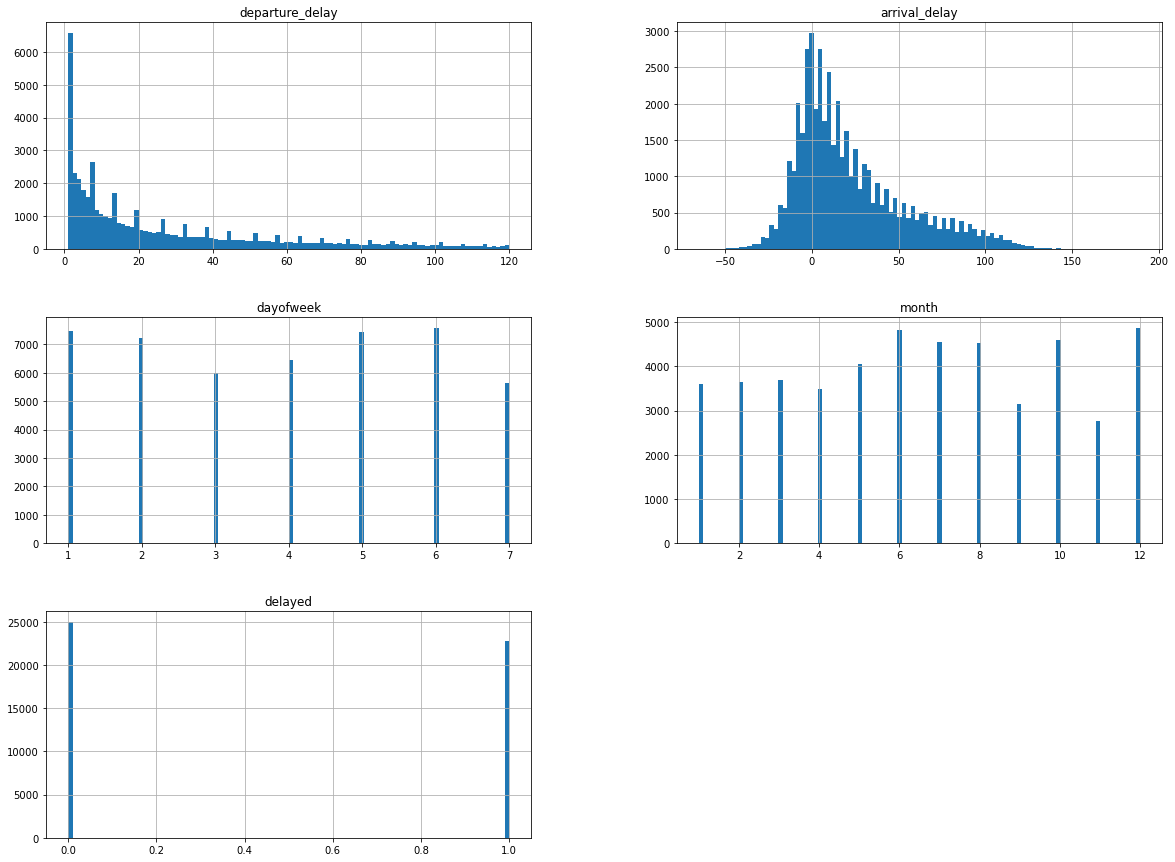

In [12]:
raw_pd.hist(bins=100, figsize=(20,15))
plt.show()

#### 2.8 EDA with Basic Stats. เพื่อดู Dispersion ของข้อมูล

In [13]:
raw_pd.describe()

,departure_delay,arrival_delay,dayofweek,month,delayed
count,47785.000000,47785.000000,47785.000000,47785.000000,47785.000000
mean,27.721147,22.218269,3.930438,6.624150,0.477158
std,29.436796,31.939881,1.995762,3.392922,0.499483
min,1.000000,-65.000000,1.000000,1.000000,0.000000
25%,5.000000,-1.000000,2.000000,4.000000,0.000000
50%,16.000000,13.000000,4.000000,7.000000,0.000000
75%,42.000000,38.000000,6.000000,10.000000,1.000000
max,120.000000,189.000000,7.000000,12.000000,1.000000


#### 2.9 กำหนด Candidated Features

In [14]:
noNullCol_list = []

In [15]:
for item_col in raw_pd.columns.to_list():
    if raw_pd[item_col].isnull().sum() == 0:
        noNullCol_list.append(item_col)
        

In [16]:
noNullCol_list

['date',
 'airline',
 'departure_airport',
 'arrival_airport',
 'departure_delay',
 'arrival_delay',
 'dayofweek',
 'month',
 'delayed']

In [17]:
candidatedFeatures_list = noNullCol_list+nullNeedCol_list

In [18]:
candidatedFeatures_pd = raw_pd.filter(candidatedFeatures_list)\
.drop(['date','arrival_delay','departure_airport'], axis=1).dropna()

#### 2.10 EDA of Candidate Features with Checking for NULL

In [19]:
candidatedFeatures_pd.isnull().sum()

airline            0
arrival_airport    0
departure_delay    0
dayofweek          0
month              0
delayed            0
dtype: int64

In [20]:
candidatedFeatures_pd.count()

airline            47785
arrival_airport    47785
departure_delay    47785
dayofweek          47785
month              47785
delayed            47785
dtype: int64

## 3. Data Preparation

## 4. Modeling (Features Transformation and ML Algorithms)

In [21]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

#### 4.1 แบ่งแยก Training/Testing Set

In [22]:
train_df = candidatedFeatures_pd.sample(frac=0.8,random_state=123)

In [23]:
test_df = candidatedFeatures_pd.drop(train_df.index)

In [24]:
train_df.count()

airline            38228
arrival_airport    38228
departure_delay    38228
dayofweek          38228
month              38228
delayed            38228
dtype: int64

In [25]:
test_df.count()

airline            9557
arrival_airport    9557
departure_delay    9557
dayofweek          9557
month              9557
delayed            9557
dtype: int64

#### 4.2 แบ่งแยก Descriptive Features and Target Feature (Label) ออกจากกัน ตามหลักการของ Scikit Learn

In [26]:
train_labels = train_df.filter(['delayed'])
train_df = train_df.loc[:, train_df.columns != 'delayed']

In [27]:
test_labels = test_df.filter(['delayed'])
test_df = test_df.loc[:, test_df.columns != 'delayed']

In [28]:
X_train = train_df

In [29]:
X_test = test_df

In [30]:
y_train = train_labels

In [31]:
y_test = test_labels

#### 4.3 ตรวจสอบว่า Features ไหนเป็น Categorical หรือ Numerical เพื่อเลือกทำ Transformation ให้เหมาะสมต่อไป

In [32]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['airline', 'arrival_airport']
Numerical columns are: ['departure_delay', 'dayofweek', 'month']


#### 4.4 Define/Run a pipeline for transforming features and modeling

In [33]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [34]:
# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]

# Define categorical pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical))
                     #('imputer', SimpleImputer(strategy='median')),
                     #('scaler', MinMaxScaler())
                    ])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])

# Model Training
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', DecisionTreeClassifier(criterion="entropy", max_depth=None))])
pipeline_model = pipe.fit(X_train, y_train)

## 5. Model Evaluation

#### 5.1 คำนวณค่าตามเกณฑ์การประเมิน

In [35]:
y_pred = pipeline_model.predict(X_test).flatten()


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (predict/actual):\n", pd.DataFrame(cm))


pipeline_model.score(X_test, y_test)

recall = np.diag(cm) / np.sum(cm, axis=1)
print("\nRecall:\n", pd.Series(recall))

precision = np.diag(cm) / np.sum(cm, axis=0)
print("\nPrecision:\n", pd.Series(precision))


from sklearn.metrics import f1_score
weighted_f1 = f1_score(y_test, y_pred, average="weighted")
print("\nF1 score:\n", weighted_f1)

Confusion Matrix (predict/actual):
       0     1
0  4157   805
1   857  3738

Recall:
 0    0.837767
1    0.813493
dtype: float64

Precision:
 0    0.829079
1    0.822804
dtype: float64

F1 score:
 0.8260544910685232


#### 5.2 คำนวณ Feature Importance

In [36]:
pipeline_model_featureUnion = pipeline_model.named_steps['model']

In [37]:
#pipeline_model_featureUnion.feature_importances_

In [38]:
pipeline_features_coeff = pipeline_model_featureUnion.feature_importances_

In [39]:
# Getting machine-readable columns
cat_columns = preprocessor.transformer_list[0][1][2].get_feature_names(categorical)
columns = np.append(cat_columns, numerical)

In [40]:
zipped = zip(columns,pipeline_features_coeff)

In [41]:
coeff_pd = pd.DataFrame(zipped,columns=["machine_features","value"])

In [42]:
coeff_pd

,machine_features,value
0,airline_AA,0.006162
1,airline_AS,0.003410
2,airline_B6,0.002127
3,airline_CO,0.003240
4,airline_DL,0.002935
...,...,...
82,arrival_airport_STL,0.000532
83,arrival_airport_TUS,0.000535
84,departure_delay,0.627186
85,dayofweek,0.082328


In [43]:
# Sort the features by the absolute value of their coefficient
coeff_pd["abs_value"] = coeff_pd["value"].apply(lambda x: abs(x))
coeff_pd["colors"] = coeff_pd["value"].apply(lambda x: "green" if x > 0 else "red")
coeff_pd = coeff_pd.sort_values("abs_value", ascending=False)

Text(0.5, 0, 'Feature Name')

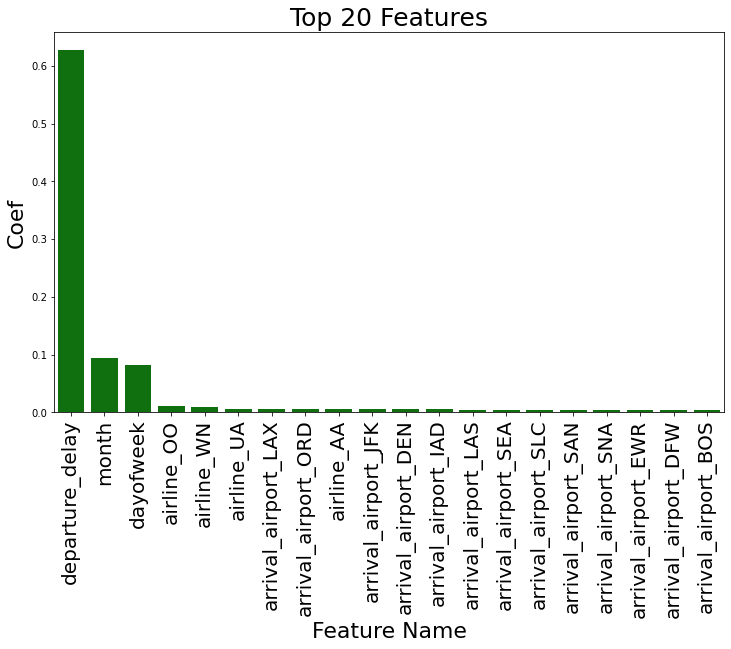

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(x="machine_features",
            y="value",
            data=coeff_pd.head(20),
           palette=coeff_pd.head(20)["colors"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=20)
ax.set_title("Top 20 Features", fontsize=25)
ax.set_ylabel("Coef", fontsize=22)
ax.set_xlabel("Feature Name", fontsize=22)

In [45]:
coeff_pd

,machine_features,value,abs_value,colors
84,departure_delay,0.627186,0.627186,green
86,month,0.093338,0.093338,green
85,dayofweek,0.082328,0.082328,green
10,airline_OO,0.010761,0.010761,green
13,airline_WN,0.008595,0.008595,green
...,...,...,...,...
26,arrival_airport_BZN,0.000201,0.000201,green
51,arrival_airport_MCI,0.000106,0.000106,green
17,arrival_airport_ANC,0.000071,0.000071,green
14,airline_YV,0.000070,0.000070,green


#### 5.3 เปรียบเทียบผลการทดลองในหลายๆ Algorithms

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
import warnings
warnings.simplefilter("ignore")


In [47]:
classifiers = {
    "Dummy"        : DummyClassifier(strategy='uniform', random_state=2),
    "KNN(3)"       : KNeighborsClassifier(3), 
    "RBF SVM"      : SVC(gamma=2, C=1), 
    "Decision Tree": DecisionTreeClassifier(max_depth=7), 
    "Random Forest": RandomForestClassifier(max_depth=7, n_estimators=10, max_features=4), 
    "Neural Net"   : MLPClassifier(alpha=1), 
    "AdaBoost"     : AdaBoostClassifier(),
    "Naive Bayes"  : GaussianNB(), 
    "QDA"          : QuadraticDiscriminantAnalysis(),
    "Linear SVC"   : LinearSVC(),
    "Linear SVM"   : SVC(kernel="linear"), 
    "Gaussian Proc": GaussianProcessClassifier(1.0 * RBF(1.0)),
}


In [48]:
from time import time
nfast = 10
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', classifier)])
    pipeline_model = pipe.fit(X_train, y_train.values.flatten())
    train_time = time() - start
    start = time()
    score = pipeline_model.score(X_test, y_test.values.flatten())
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))

Dummy          | score = 0.501 | time = 0.056s/0.015s
KNN(3)         | score = 0.849 | time = 0.048s/5.880s
RBF SVM        | score = 0.777 | time = 658.263s/60.104s
Decision Tree  | score = 0.872 | time = 0.191s/0.016s
Random Forest  | score = 0.871 | time = 0.181s/0.022s
Neural Net     | score = 0.874 | time = 31.979s/0.038s
AdaBoost       | score = 0.873 | time = 2.462s/0.140s
Naive Bayes    | score = 0.725 | time = 0.092s/0.022s
QDA            | score = 0.825 | time = 0.358s/0.048s
Linear SVC     | score = 0.873 | time = 2.328s/0.015s
